In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy  
from scipy import stats             


In [16]:
# Load data

data = pd.read_csv("Diet_R.csv")
data    

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2
74,75,1,49,177,84,3,79.9
75,76,1,28,164,85,3,79.7
76,77,1,40,167,87,3,77.8


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Person        78 non-null     int64  
 1   gender        78 non-null     object 
 2   Age           78 non-null     int64  
 3   Height        78 non-null     int64  
 4   pre.weight    78 non-null     int64  
 5   Diet          78 non-null     int64  
 6   weight6weeks  78 non-null     float64
dtypes: float64(1), int64(5), object(1)
memory usage: 4.4+ KB


In [18]:
# Index 25, 26 thiếu dữ liệu -> loại bỏ 
rm = data.drop([0, 1])
rm

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
5,4,0,33,171,64,1,61.1
6,5,0,50,170,65,1,62.2
...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2
74,75,1,49,177,84,3,79.9
75,76,1,28,164,85,3,79.7
76,77,1,40,167,87,3,77.8


In [19]:
# Sắp xếp index 

t = rm.set_index('Person')
data_new = t.sort_index()
data_new

,gender,Age,Height,pre.weight,Diet,weight6weeks
Person,,,,,,
1,0,22,159,58,1,54.2
2,0,46,192,60,1,54.0
3,0,55,170,64,1,63.3
4,0,33,171,64,1,61.1
5,0,50,170,65,1,62.2
...,...,...,...,...,...,...
74,1,35,183,83,3,80.2
75,1,49,177,84,3,79.9
76,1,28,164,85,3,79.7


## Task 1: Ignore diet and test to see if weight has been lost
## Task 2: Remove weight lost and get students to calculate it using before/after weights

In [20]:
weightLOST = data_new['pre.weight'] - data_new['weight6weeks']
weightLOST

Person
1     3.8
2     6.0
3     0.7
4     2.9
5     2.8
     ... 
74    2.8
75    4.1
76    5.3
77    9.2
78    6.1
Length: 76, dtype: float64

In [21]:
# Thêm cột dữ liệu weightLOST vào data_new

pop = data_new.pop('pre.weight')
data_new.insert(4, "pre.weight", pop)
data_new.insert(6, 'weightLOST', weightLOST) 
data_new

,gender,Age,Height,Diet,pre.weight,weight6weeks,weightLOST
Person,,,,,,,
1,0,22,159,1,58,54.2,3.8
2,0,46,192,1,60,54.0,6.0
3,0,55,170,1,64,63.3,0.7
4,0,33,171,1,64,61.1,2.9
5,0,50,170,1,65,62.2,2.8
...,...,...,...,...,...,...,...
74,1,35,183,3,83,80.2,2.8
75,1,49,177,3,84,79.9,4.1
76,1,28,164,3,85,79.7,5.3


In [22]:
# Nếu weightLOST > 0 => giảm cân thành công
# Nếu weightLOST = 0 => không có hiệu quả
# Nếu weightLOST < 0 => phản tác dụng

lost_weight_succ = data_new[data_new['weightLOST'] > 0]
lost_weight_succ

,gender,Age,Height,Diet,pre.weight,weight6weeks,weightLOST
Person,,,,,,,
1,0,22,159,1,58,54.2,3.8
2,0,46,192,1,60,54.0,6.0
3,0,55,170,1,64,63.3,0.7
4,0,33,171,1,64,61.1,2.9
5,0,50,170,1,65,62.2,2.8
...,...,...,...,...,...,...,...
74,1,35,183,3,83,80.2,2.8
75,1,49,177,3,84,79.9,4.1
76,1,28,164,3,85,79.7,5.3


In [23]:
lost_weight_fail = data_new[data_new['weightLOST'] < 0]
lost_weight_fail

,gender,Age,Height,Diet,pre.weight,weight6weeks,weightLOST
Person,,,,,,,
15,1,39,168,1,71,71.6,-0.6
27,0,44,174,2,58,60.1,-2.1
40,0,29,169,2,77,77.5,-0.5
50,1,39,180,2,80,81.4,-1.4


## Nhận xét:

- Có 72/76 trường hợp thực hiện giảm cân hiệu quả
- Có 4/76 trường hợp thực hiện giảm cân bị phản tác dụng tức là tăng cân 

## Phát biểu giả thiết

$H_0: \mu_0 = \mu_1$. Cân nặng trung bình của trước và sau khi giảm cân là như nhau 

$H_1: \mu_0 \neq \mu_1$. Cân nặng trung bình của trước và sau khi giảm cân khác nhau


In [24]:
pre_w = data_new['pre.weight']
aft_w = data_new['weight6weeks']    

In [25]:
std1, p1 = scipy.stats.ttest_ind(pre_w, aft_w)
print(std1, p1)
print("-"*50)
alpha = 0.05
if p1 < alpha:
    print('Có đủ bằng chứng để bác bỏ giả thuyết H0. Điều này ngụ ý rằng cân nặng trước và sau khi giảm cân là có sự khác biệt.')
else:
    print('Không đủ bằng chứng để bác bỏ giả thiết H0. Điều này ngụ ý rằng cân nặng trước và sau khi giảm cân không có sự khác biệt')

3.0342255247628476 0.0028431949414180584
--------------------------------------------------
Có đủ bằng chứng để bác bỏ giả thuyết H0. Điều này ngụ ý rằng cân nặng trước và sau khi giảm cân là có sự khác biệt.


Text(0.5, 1.0, 'Weight before and after diet')

<Figure size 432x576 with 0 Axes>

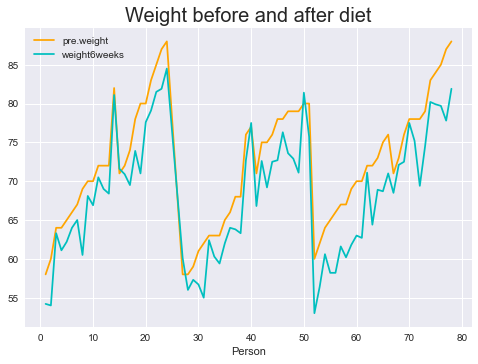

In [26]:
# Biểu đồ cân nặng trước và sau khi giảm cân

plt.figure(figsize=(6, 8))
plt.style.use('seaborn')
data_new[['pre.weight', 'weight6weeks']].plot(color= ['orange', 'c'])
plt.title('Weight before and after diet', fontsize=20)

## Task 3: Summary statistics by diet 

In [27]:
# Lấy slice data gồm "Diet" và "weightLOST" để phân tích 

data3 = data_new[['Diet', 'weightLOST']]
data3

,Diet,weightLOST
Person,,
1,1,3.8
2,1,6.0
3,1,0.7
4,1,2.9
5,1,2.8
...,...,...
74,3,2.8
75,3,4.1
76,3,5.3


In [29]:
# Lấy index đã phân loại

diet = data3.groupby('Diet').groups

In [32]:
# Lấy giá trị tương ứng ở cột des_weight 

type_1 = weightLOST[diet[1]]
type_2 = weightLOST[diet[2]]
type_3 = weightLOST[diet[3]]
type_1

Person
1     3.8
2     6.0
3     0.7
4     2.9
5     2.8
6     2.0
7     2.0
8     8.5
9     1.9
10    3.1
11    1.5
12    3.0
13    3.6
14    0.9
15   -0.6
16    1.1
17    4.5
18    4.1
19    9.0
20    2.4
21    3.9
22    3.5
23    5.1
24    3.5
dtype: float64

## Thông kê đơn giản với 3 phương pháp ăn kiêng bằng hàm `describle`

In [33]:
type_1.describe()

count    24.000000
mean      3.300000
std       2.240148
min      -0.600000
25%       1.975000
50%       3.050000
75%       3.950000
max       9.000000
dtype: float64

In [34]:
type_2.describe()

count    25.000000
mean      3.268000
std       2.464535
min      -2.100000
25%       2.000000
50%       3.500000
75%       4.700000
max       7.900000
dtype: float64

In [35]:
type_3.describe()

count    27.000000
mean      5.148148
std       2.395568
min       0.500000
25%       3.450000
50%       5.400000
75%       7.000000
max       9.200000
dtype: float64

## Task 4: 

### 4.1: Which diet was best for losing weight?

Xây dựng giả thiết:

- $H_0: \mu_1 = \mu_2 = \mu_3$

- $H_1: \mu_i \neq \mu_j$ (i $\neq$ j ,  i, j $\in \overline{1,3}$)

## Kiểm tra mỗi nhóm có thuộc phân phối chuẩn chưa

### Sử dụng Shapiro-Wilk test 

Phát biểu giả thiết:

$H_0$: Phân phối của feature là chuẩn

$H_1$: Phân phối của feature là không chuẩn

In [36]:
# Kiểm tra Type_1
from scipy.stats import shapiro
stat_type_1, p_type_1 = shapiro(type_1)
print('stat=%.3f, p=%.3f' % (stat_type_1, p_type_1))
if p_type_1 > 0.05:
    print('Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn')
    print('Đủ điều kiện để phân tích tiếp')
else:
    print('Dữ liệu không tuân theo luật phân phối chuẩn')
    

stat=0.926, p=0.077
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
Đủ điều kiện để phân tích tiếp


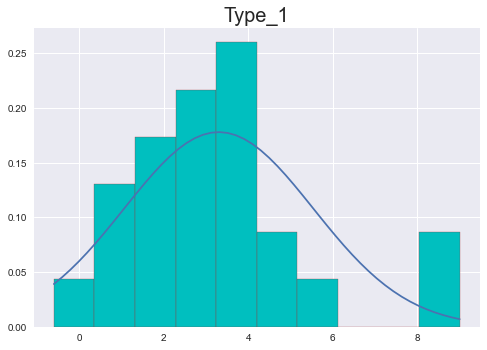

In [37]:
mean = np.mean(type_1)
# ddof=1 :: hiệu chỉnh
std = np.std(type_1, ddof=1)
domain = np.linspace(np.min(type_1), np.max(type_1))
plt.plot(domain, stats.norm.pdf(domain, mean, std))
#density=True :: chuẩn hóa dữ liệu về normal
plt.hist(type_1, color='c', edgecolor='brown', density=True)
plt.title("Type_1", fontsize=20)
plt.show()

In [38]:
# Kiểm tra Type_2

stat_type_2, p_type_2 = shapiro(type_2)
print('stat=%.3f, p=%.3f' % (stat_type_2, p_type_2))
if p_type_2 > 0.05:
    print('Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn')
    print('Đủ điều kiện để phân tích tiếp')
else:
    print('Dữ liệu không tuân theo luật phân phối chuẩn')
   

stat=0.979, p=0.872
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
Đủ điều kiện để phân tích tiếp


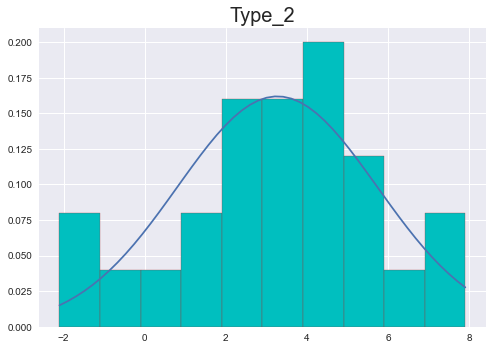

In [39]:
mean = np.mean(type_2)
# ddof=1 :: hiệu chỉnh
std = np.std(type_2, ddof=1)
domain = np.linspace(np.min(type_2), np.max(type_2))
plt.plot(domain, stats.norm.pdf(domain, mean, std))
#density=True :: chuẩn hóa dữ liệu về normal
plt.hist(type_2, color='c', edgecolor='brown', density=True)
plt.title("Type_2", fontsize=20)
plt.show()

In [40]:
# Kiểm tra Type_3

stat_type_3, p_type_3 = shapiro(type_3)
print('stat=%.3f, p=%.3f' % (stat_type_3, p_type_3))
if p_type_3 > 0.05:
    print('Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn')
    print('Đủ điều kiện để phân tích tiếp')
else:
    print('Dữ liệu không tuân theo luật phân phối chuẩn')


stat=0.960, p=0.372
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
Đủ điều kiện để phân tích tiếp


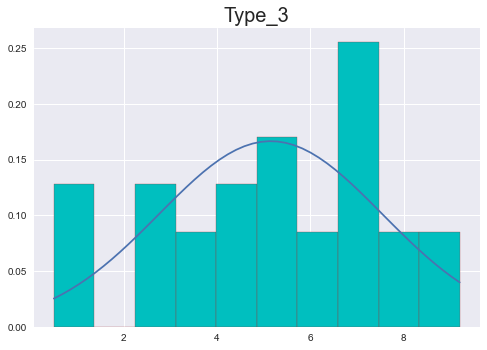

In [41]:
mean = np.mean(type_3)
# ddof=1 :: hiệu chỉnh
std = np.std(type_3, ddof=1)
domain = np.linspace(np.min(type_3), np.max(type_3))
plt.plot(domain, stats.norm.pdf(domain, mean, std))
#density=True :: chuẩn hóa dữ liệu về normal
plt.hist(type_3, color='c', edgecolor='brown', density=True)
plt.title("Type_3", fontsize=20)
plt.show()

## Kiểm định tính thuần nhất phương sai (homogeneity of variance)

### Bartlett’s Test

Phát biểu các giả thiết:


$H_0$: Các feature đều có phương sai đồng nhất 

$H_1$: Có ít nhất 2 feature có phương sai khác nhau (lớn)

Chú ý: Nếu p < 0.05 = $\alpha$ thì loại giả thiết $H_0$. Tức là các feature không đồng nhất về phương sai.

In [42]:
from scipy.stats import bartlett
stat_bartlett, p_bartlett = bartlett(type_1, type_2, type_3)
print(stat_bartlett, p_bartlett)
if p_bartlett > 0.05:
    print('Không thể bác bỏ giả thiết H0. Các feature đồng nhất về phương sai')
    print('Đủ điều kiện đê phân tích ANOVA')
else:
    print('Các feature không đồng nhất về phương sai')

0.21811133918795061 0.8966804982694925
Không thể bác bỏ giả thiết H0. Các feature đồng nhất về phương sai
Đủ điều kiện đê phân tích ANOVA


## Phân tích ANOVA

In [43]:
# Tiến hành phân tích ANOVA 1 chiều

from scipy.stats import f_oneway
std2 , p2 = f_oneway(type_1, type_2, type_3)
print('P_value = ',p2)
alpha = 0.05
if (p2 < alpha):
    print('Có bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng hiệu quả giữa các phương pháp có sự khác biệt')
else:
    print('Không đủ bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng hiệu quả giữa các phương pháp không có sự khác biệt.')

P_value =  0.006595853108669741
Có bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng hiệu quả giữa các phương pháp có sự khác biệt


In [45]:
# ANOVA table

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('weightLOST ~ C(Diet)', data=data_new).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Diet),60.527008,2.0,5.383104,0.006596
Residual,410.401807,73.0,NaN,NaN


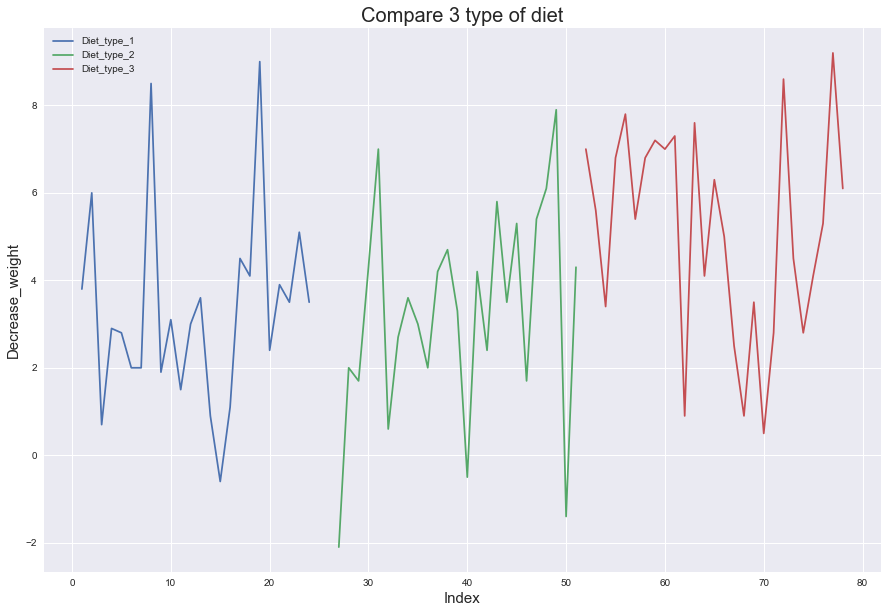

In [46]:
# Biểu đồ thể hiện mức độ hiệu quả của 3 loại ăn kiêng

plt.figure(figsize=(15, 10))
plt.plot(type_1)
plt.plot(type_2)
plt.plot(type_3)
plt.title("Compare 3 type of diet", fontsize=20)
plt.xlabel("Index", fontsize=15)
plt.ylabel("Decrease_weight", fontsize=15)
plt.legend(["Diet_type_1", "Diet_type_2", "Diet_type_3"])

In [47]:
df = pd.DataFrame({'Type_1': type_1, 'Type_2': type_2, 'Type_3': type_3})
df

,Type_1,Type_2,Type_3
Person,,,
1,3.8,NaN,NaN
2,6.0,NaN,NaN
3,0.7,NaN,NaN
4,2.9,NaN,NaN
5,2.8,NaN,NaN
...,...,...,...
74,NaN,NaN,2.8
75,NaN,NaN,4.1
76,NaN,NaN,5.3


Text(0, 0.5, 'Count')

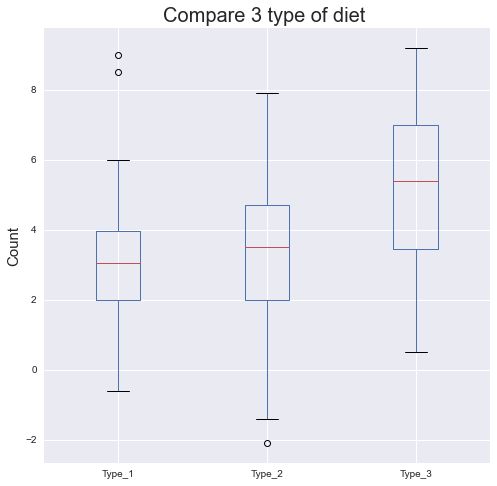

In [48]:
# Vẽ boxplot cho 3 phương pháp ăn kiêng 

plt.figure(figsize=(8, 8))
plt.title('Compare 3 type of diet ', fontsize=20)
df.boxplot()
plt.ylabel('Count', fontsize=15)

## Kiểm định hậu ANOVA (Phân tích sâu ANOVA)

(tức là kiểm tra hiệu quả giữa các phương pháp ăn kiêng và xem thử phương pháp nào cho hiệu quả tốt nhất)

## Phát biểu giả thiết:

Xét hiệu quả giữa phương pháp 1 và 2:

- $H_0$: Phương pháp 1 và 2 cho hiệu quả tương đương
- $H_1$: Một trong 2 phương pháp cho hiệu quả tốt hơn 

Xét hiệu quả giữa phương pháp 1 và 3:

- $H_0$: Phương pháp 1 và 3 cho hiệu quả tương đương
- $H_1$: Một trong 2 phương pháp cho hiệu quả tốt hơn 


Xét hiệu quả giữa phương pháp 2 và 3:

- $H_0$: Phương pháp 2 và 3 cho hiệu quả tương đương
- $H_1$: Một trong 2 phương pháp cho hiệu quả tốt hơn 

In [61]:
import statsmodels.api as sa
import statsmodels.formula.api as sfa
import scikit_posthocs as sp


lm = sfa.ols('weightLOST ~ C(Diet)', data=data_new).fit()
anova = sa.stats.anova_lm(lm)
print(anova)

            df      sum_sq    mean_sq         F    PR(>F)
C(Diet)    2.0   60.527008  30.263504  5.383104  0.006596
Residual  73.0  410.401807   5.621943       NaN       NaN


In [65]:
sp.posthoc_ttest(data_new, val_col='weightLOST', group_col='Diet', p_adjust='holm')

,1,2,3
1,1.000000,0.962316,0.019933
2,0.962316,1.000000,0.019933
3,0.019933,0.019933,1.000000


## Nhận xét:

- $p_{12} = 0.9623$ > 0.05 $\Rightarrow$ Có đủ bằng chứng để bác bỏ giả thuyết H1. Điều này ngụ ý rằng phương pháp 1 và 2 cho hiệu quả tương đương nhau 
- $p_{13} = 0.0199$ < 0.05 $\Rightarrow$ Có đủ bằng chứng để bác bỏ giả thuyết H0. Điều này ngụ ý rằng một trong 2 phương pháp cho hiệu quả tốt hơn 
- $p_{23} = 0.0199$ < 0.05 $\Rightarrow$ Có đủ bằng chứng để bác bỏ giả thuyết H0. Điều này ngụ ý rằng một trong 2 phương pháp cho hiệu quả tốt hơn

## Kiểm tra xem phương pháp 1, 2 hay phương pháp 3 cho hiệu quả tốt hơn 

In [49]:
# Range and Standard deviation of type_1

min1 = abs(type_1).min()
max1 = type_1.max()
print(min1)
print(max1)
print('Range: ',max1-min1)
type_1.std()

0.5999999999999943
9.0
Range:  8.400000000000006


2.240147510670941

In [50]:
# Range and Standard deviation of type_1

min2 = abs(type_2).min()
max2 = type_2.max()
print(min2)
print(max2)
print('Range: ',max2-min2)
type_2.std()

0.5
7.900000000000006
Range:  7.400000000000006


2.464535115053818

In [51]:
# Range and Standard deviation of type_1

min3 = type_3.min()
max3 = type_3.max()
print(min3)
print(max3)
print('Range: ',max3-min3)
type_3.std()

0.5
9.200000000000003
Range:  8.700000000000003


2.3955680826781847

In [52]:
Range = [max1-min1, max2-min2, max3-min3]
Std = [type_1.std(), type_2.std(), type_3.std()]
Name = ['1', '2', '3']
table = list(zip(Name, Range, Std))
table = pd.DataFrame(table)
table.columns = ['Type', 'Range', 'Std']
table

,Type,Range,Std
0,1,8.4,2.240148
1,2,7.4,2.464535
2,3,8.7,2.395568


$\Rightarrow$ Loại 3 cho hiệu quả tốt nhất vì phạm vi và độ lệch chuẩn lớn nhất

### 4.2: Are there gender differences for weight lost?

- Xây dựng giả thuyết 

    - $H_0:$ Khả năng giảm cân phụ thuộc vào giới tính

    - $H_0:$ Khả năng giảm cân không phụ thuộc vào giới tính

In [66]:
data42 = data_new[['gender', 'weightLOST']]
data42

,gender,weightLOST
Person,,
1,0,3.8
2,0,6.0
3,0,0.7
4,0,2.9
5,0,2.8
...,...,...
74,1,2.8
75,1,4.1
76,1,5.3


In [67]:
gr42 = data42.groupby('gender').groups
gr42

{'0': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66], '1': [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]}

In [115]:
gen0 = weightLOST[gr42['0']]
gen1 = weightLOST[gr42['1']]


## Kiểm tra mỗi nhóm có thuộc phân phối chuẩn chưa

### Sử dụng Shapiro-Wilk test 

Phát biểu giả thiết:

$H_0$: Phân phối của feature là chuẩn

$H_1$: Phân phối của feature là không chuẩn

In [71]:
# Kiểm tra gen0

stat_gen_0, p_gen_0 = shapiro(gen0)
print('stat=%.3f, p=%.3f' % (stat_gen_0, p_gen_0))
if p_gen_0 > 0.05:
    print('Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn')
    print('Đủ điều kiện để phân tích tiếp')
else:
    print('Dữ liệu không tuân theo luật phân phối chuẩn')
    

stat=0.970, p=0.305
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
Đủ điều kiện để phân tích tiếp


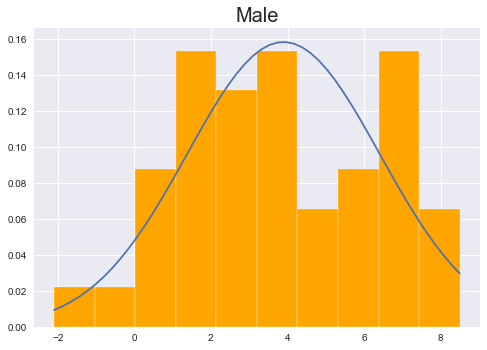

In [72]:
mean = np.mean(gen0)
# ddof=1 :: hiệu chỉnh
std = np.std(gen0, ddof=1)
domain = np.linspace(np.min(gen0), np.max(gen0))
plt.plot(domain, stats.norm.pdf(domain, mean, std))
#density=True :: chuẩn hóa dữ liệu về normal
plt.hist(gen0, color='orange', edgecolor='white', density=True)
plt.title("Male", fontsize=20)
plt.show()

In [73]:
# Kiểm tra gen1

stat_gen_1, p_gen_1 = shapiro(gen1)
print('stat=%.3f, p=%.3f' % (stat_gen_1, p_gen_1))
if p_gen_1 > 0.05:
    print('Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn')
    print('Đủ điều kiện để phân tích tiếp')
else:
    print('Dữ liệu không tuân theo luật phân phối chuẩn')
    

stat=0.975, p=0.638
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
Đủ điều kiện để phân tích tiếp


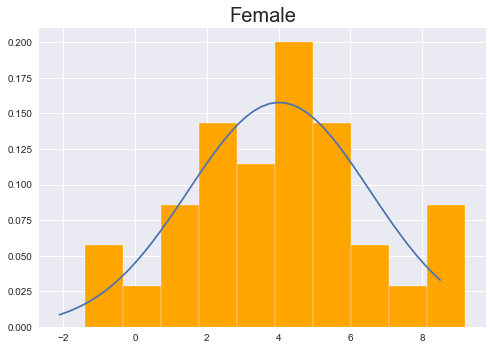

In [74]:
mean = np.mean(gen1)
# ddof=1 :: hiệu chỉnh
std = np.std(gen1, ddof=1)
domain = np.linspace(np.min(gen0), np.max(gen0))
plt.plot(domain, stats.norm.pdf(domain, mean, std))
#density=True :: chuẩn hóa dữ liệu về normal
plt.hist(gen1, color='orange', edgecolor='white', density=True)
plt.title("Female", fontsize=20)
plt.show()

## Kiểm định tính thuần nhất phương sai (homogeneity of variance)

### Bartlett’s Test

Phát biểu các giả thiết:


$H_0$: Các feature đều có phương sai đồng nhất 

$H_1$: Có ít nhất 2 feature có phương sai khác nhau (lớn)

Chú ý: Nếu p < 0.05 = $\alpha$ thì loại giả thiết $H_0$. Tức là các feature không đồng nhất về phương sai.

In [75]:
from scipy.stats import bartlett
stat_bartlett, p_bartlett = bartlett(gen0, gen1)
print(stat_bartlett, p_bartlett)
if p_bartlett > 0.05:
    print('Không thể bác bỏ giả thiết H0. Các feature đồng nhất về phương sai')
    print('Đủ điều kiện đê phân tích ANOVA')
else:
    print('Các feature không đồng nhất về phương sai')

0.0010952221531771032 0.9735995151820288
Không thể bác bỏ giả thiết H0. Các feature đồng nhất về phương sai
Đủ điều kiện đê phân tích ANOVA


## Phân tích ANOVA

In [76]:
from scipy.stats import f_oneway
std3 , p3 = f_oneway(gen0, gen1)
print('P_value = ',p3)
alpha = 0.05
if (p3 < alpha):
    print('Có bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng hiệu quả giữa các phương pháp có ảnh hưởng bởi giới tính')
else:
    print('Không đủ bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng hiệu quả giữa các phương pháp không ảnh hưởng bởi giới tính.')

P_value =  0.8348273886348012
Không đủ bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng hiệu quả giữa các phương pháp không ảnh hưởng bởi giới tính.


In [78]:
# ANOVA Table

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('weightLOST ~ C(gender)', data=data_new).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(gender),0.278485,1.0,0.043786,0.834827
Residual,470.650331,74.0,NaN,NaN


## Task 5: Effect of diet and gender on weight lost

- Giả thuyết:

$H_0$: Hiệu quả giảm cân của nam và nữ là như nhau.

$H_1$: Hiệu quả giảm cân của nam và nữ là khác nhau.

In [79]:
# Với mức ý nghĩa 5% thì hiệu quả giảm cân của nam và của nữ có khác nhau không


def results(p, vals=['mean1', 'mean2'], alpha=0.05):
    cols=['score', 'p_value', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    if vals: cols = vals + cols
    return df[cols]

from scipy.stats import ttest_1samp

p = {}
p['mean1'] = np.mean(gen0)
p['mean2'] = np.mean(gen1)
p['score'], p['p_value'] = ttest_1samp(gen0, p['mean2'])
results(p)

,mean1,mean2,score,p_value,KetLuan
,3.893023,4.015152,-0.318316,0.751823,Chấp nhận H0 với mức ý nghĩa 0.05


## Task 6: Means plot of weight lost by diet and gender 

<AxesSubplot:title={'center':'Plots of weight lost by diet and gender'}, xlabel='gender', ylabel='weightLOST'>

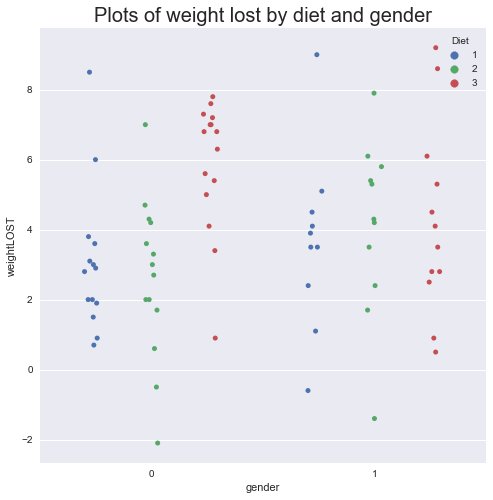

In [114]:
plt.figure(figsize=(8, 8))

plt.title('Plots of weight lost by diet and gender', fontsize= 20)
sns.color_palette('bright')
sns.stripplot(x='gender', y='weightLOST', data=data_new, jitter=True, hue='Diet', dodge=True)

## Task 7: Add height to either ANOVA

In [117]:
data7 = data_new[['Height', 'gender', 'Diet', 'weightLOST']]
data7

,Height,gender,Diet,weightLOST
Person,,,,
1,159,0,1,3.8
2,192,0,1,6.0
3,170,0,1,0.7
4,171,0,1,2.9
5,170,0,1,2.8
...,...,...,...,...
74,183,1,3,2.8
75,177,1,3,4.1
76,164,1,3,5.3


In [119]:
from pingouin import ancova

#perform ANCOVA
ancova(data=data7, dv='weightLOST', covar='Height', between='Diet')

,Source,SS,DF,F,p-unc,np2
0,Diet,54.939344,2,4.824629,0.010807,0.118179
1,Height,0.460119,1,0.080813,0.777015,0.001121
2,Residual,409.941688,72,NaN,NaN,NaN
